In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from matplotlib import pyplot as plt

In [29]:
df = pd.read_csv('vehicles.csv')

In [30]:
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


# Подготовка данных

### Дропаем явно бесполезные колонки

In [31]:
df = df.drop(['id', 'url', 'region_url', 'image_url', 'description', 'county', 'VIN', 'lat', 'long', 'title_status'], axis=1)

### Мы также не будем использовать название модели автомобиля, данные об округе (штат оставим) и дату выставления (везде с апреля по май 2021)

In [32]:
df = df.drop(['model', 'region', 'posting_date'], axis=1)


### Посмотрим на процент заполнения колонок

In [33]:
df.isna().sum() / df.shape[0] * 100.00

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

### Попытаемся заполнить недостающие данные, будем изучать самые частые значения и смотреть на гистограммы

In [34]:
col = 'condition'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

good         0.28
excellent    0.24
like new     0.05
fair         0.02
new           0.0
salvage       0.0
Name: condition, dtype: object

In [35]:
col = 'transmission'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

automatic    0.79
other        0.15
manual       0.06
Name: transmission, dtype: object

In [36]:
col = 'transmission'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

automatic    0.79
other        0.15
manual       0.06
Name: transmission, dtype: object

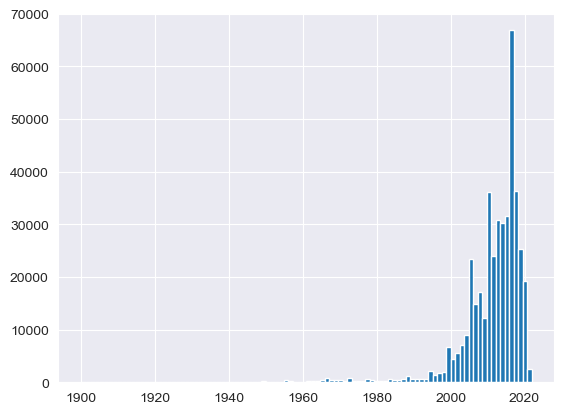

In [37]:
col = 'year'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [38]:
col = 'size'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

full-size      0.15
mid-size       0.08
compact        0.05
sub-compact    0.01
Name: size, dtype: object

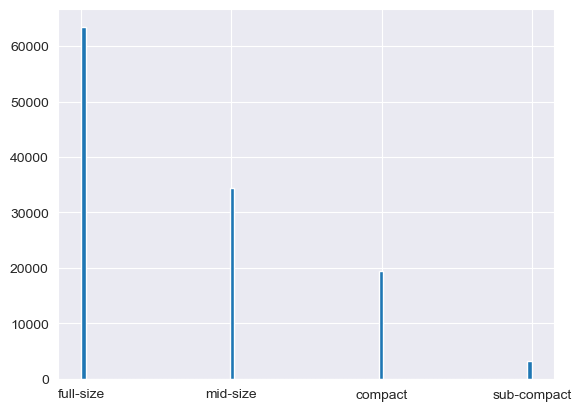

0    full-size
Name: size, dtype: object

In [39]:
df[col].hist(bins=100)
plt.show()
df[col].mode()

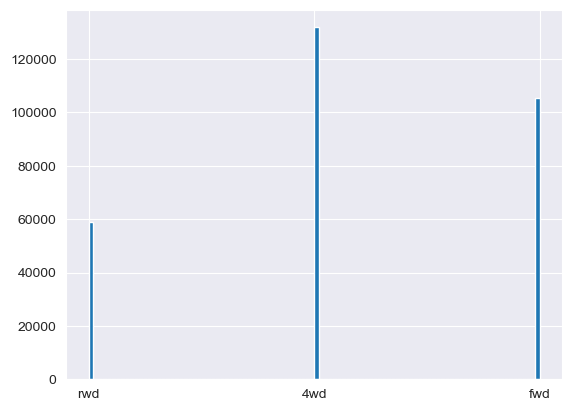

In [40]:
col = 'drive'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [41]:
df[col].mode()

0    4wd
Name: drive, dtype: object

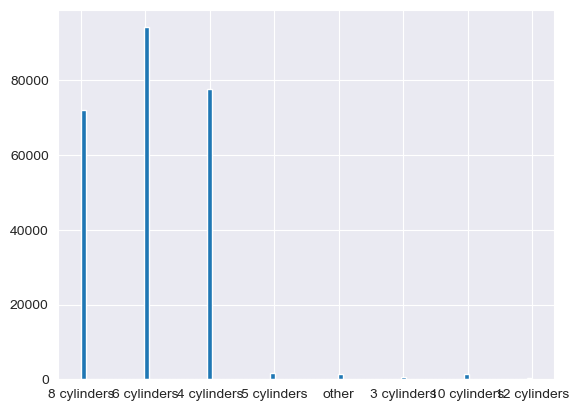

In [42]:
col = 'cylinders'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [43]:
col = 'odometer'
df[col].mean(), df[col].median()

(98043.33144290854, 85548.0)

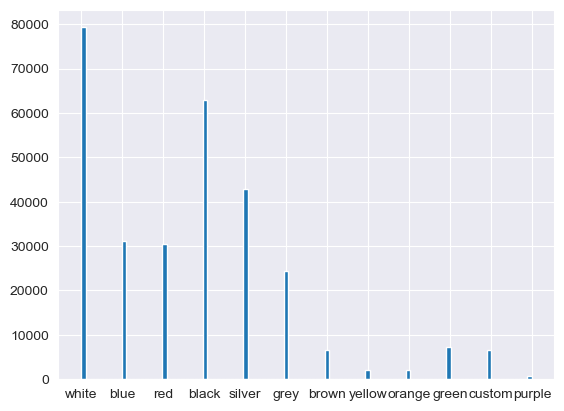

In [44]:
col = 'paint_color'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [45]:
col = 'type'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

sedan           0.2
SUV            0.18
pickup          0.1
truck          0.08
other          0.05
coupe          0.04
hatchback      0.04
wagon          0.03
van            0.02
convertible    0.02
Name: type, dtype: object

### Заменим пропущенные condition на good

In [46]:
df['condition'].fillna('good', inplace=True)

### Заменим пропущенные transmission на automatic

In [47]:
df['condition'].fillna('automatic', inplace=True)

### Перейдем к году, среднее значение в данном случае бессмысленно, так что возьмем самое частое значение

In [48]:
df['year'].fillna(2017, inplace=True)

### Неясно как заменить значения в size, так как пропусков много, дропать строки жалко, а оставшиеся заполнены неравномерно, избавимся от этой колонки. Аналогичная проблема с drive и cylinders.

In [49]:
df = df.drop('size', axis=1)
df = df.drop('drive', axis=1)
df = df.drop('cylinders', axis=1)

### Для пробега медиана и среднее отличаются не сильно, значит распределение хорошее, заменим на медиану

In [50]:
df['odometer'].fillna(df['odometer'].median(), inplace=True)

### Заменим цвет на наиболее часто встречающийся белый

In [51]:
df['paint_color'].fillna('white', inplace=True)

## Посмотрим чего удалось добиться

In [52]:
df.isna().sum() / df.shape[0] * 100.00

price            0.000000
year             0.000000
manufacturer     4.133714
condition        0.000000
fuel             0.705819
odometer         0.000000
transmission     0.598763
type            21.752717
paint_color      0.000000
state            0.000000
dtype: float64

## Далее дропнем строки с NaN

In [53]:
df = df.dropna()
df.tail()

,price,year,manufacturer,condition,fuel,odometer,transmission,type,paint_color,state
426875,23590,2019.0,nissan,good,gas,32226.0,other,sedan,white,wy
426876,30590,2020.0,volvo,good,gas,12029.0,other,sedan,red,wy
426877,34990,2020.0,cadillac,good,diesel,4174.0,other,hatchback,white,wy
426878,28990,2018.0,lexus,good,gas,30112.0,other,sedan,silver,wy
426879,30590,2019.0,bmw,good,gas,22716.0,other,coupe,white,wy


# Убедимся что с типами все в порядке

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319498 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         319498 non-null  int64  
 1   year          319498 non-null  float64
 2   manufacturer  319498 non-null  object 
 3   condition     319498 non-null  object 
 4   fuel          319498 non-null  object 
 5   odometer      319498 non-null  float64
 6   transmission  319498 non-null  object 
 7   type          319498 non-null  object 
 8   paint_color   319498 non-null  object 
 9   state         319498 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 26.8+ MB


## Закодируем категориальные переменные

In [55]:
import category_encoders as ce

encoder = ce.CountEncoder()
df_num = encoder.fit_transform(df)
df_num.head()

,price,year,manufacturer,condition,fuel,odometer,transmission,type,paint_color,state
27,33590,2014.0,12798,215002,267268,57923.0,59082,42246,128692,3445
28,22590,2010.0,40928,215002,267268,71229.0,59082,42246,27361,3445
29,39590,2020.0,40928,215002,267268,19160.0,59082,42246,26161,3445
30,30990,2017.0,27345,215002,267268,41124.0,59082,42246,26161,3445
31,15000,2013.0,52028,82859,267268,128000.0,244504,33461,56120,3445


## Посмотрим как коррелируют наши величины

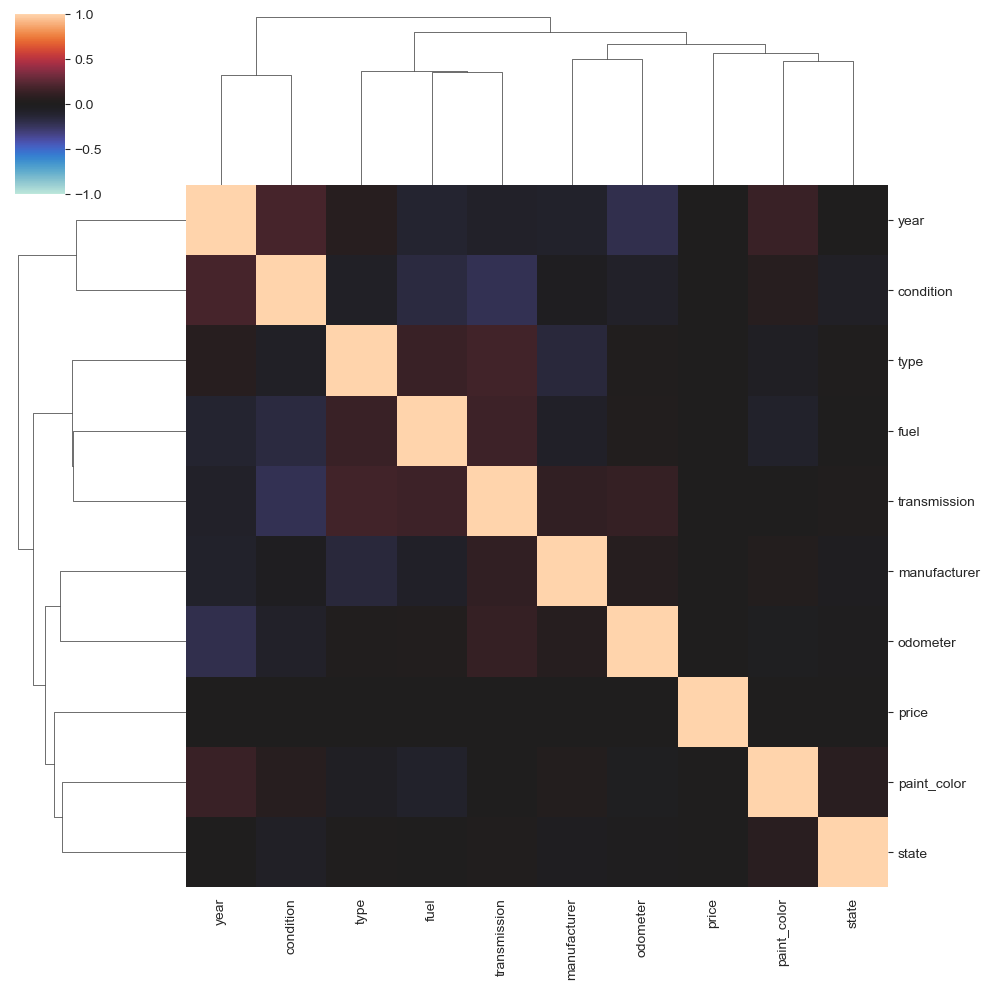

In [56]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        #select_dtypes([np.number])
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(df_num, annot=None)

### Видим что цена особо ни от чего явно не зависит